# Prediction of Probability of You Getting an Admit in the US for Masters



The dataset contains several arguments(basically the inputs you need to provide) which are considered for the application for Masters Programs. The parameters included are :


GRE Scores ( out of 340 )
TOEFL Scores ( out of 120 )
Under Grad University Rating ( out of 5 )
Statement of Purpose (out of 5 )
Letter of Recommendation Strength ( out of 5 )
Undergraduate GPA ( out of 10 )
Research Experience ( either 0 or 1 )
Chance of Admit ( ranging from 0 to 1 )

Dataset: https://www.kaggle.com/mohansacharya/graduate-admissions/home

Importing the necessary libraries for implementing Analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis 

As the Dataset is clean and has no null values we are directly going to implement the Exploration

In [2]:
Reading = pd.read_csv("Admission_Predict.csv")
Reading.head() #printing the first five rows 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
Reading.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Finding out if there are any null values

In [4]:
Null=Reading.isnull()
Null.sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Renaming columns

In [5]:
Reading = Reading.rename(columns={'GRE Score': 'GRE Score', 'TOEFL Score': 'TOEFL Score', 'LOR ': 'LOR', 'Chance of Admit ': 'Admit Possibilty'})
Reading.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit Possibilty
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Dropping unwanted columns

In [6]:
Reading.drop('Serial No.', axis='columns', inplace=True)
Reading.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit Possibilty
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Visualization 

In [7]:
gre_score = Reading[["GRE Score"]] #selecting only the required coloumn
toefl_score = Reading[["TOEFL Score"]] 
uni_rating=  Reading[["University Rating"]]


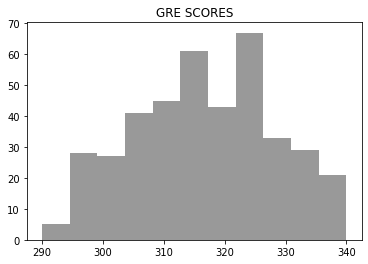

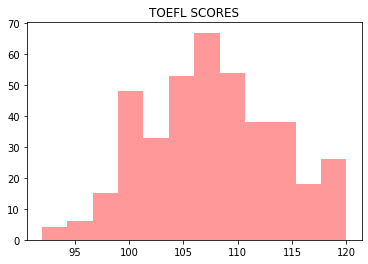

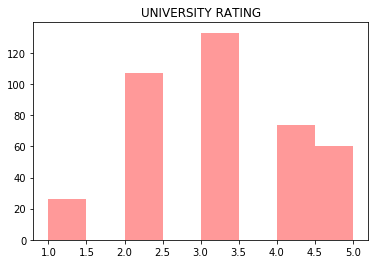

In [8]:
fig=sns.distplot(gre_score,color='black',kde=False)
plt.title("GRE SCORES")
plt.show()

fig=sns.distplot(toefl_score,color='r',kde=False)
plt.title("TOEFL SCORES")
plt.show()

fig=sns.distplot(uni_rating,color='r',kde=False)
plt.title("UNIVERSITY RATING")
plt.show()

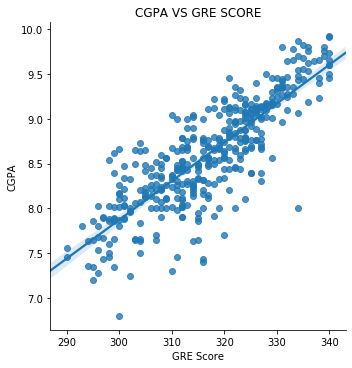

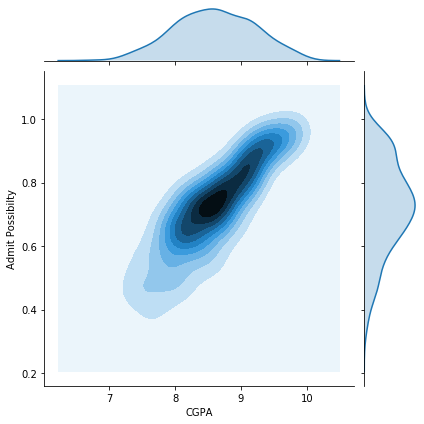

In [9]:
fig=sns.lmplot(x='GRE Score',y='CGPA',data=Reading)
plt.title("CGPA VS GRE SCORE")
plt.show()


fig=sns.jointplot(x='CGPA',y='Admit Possibilty',data=Reading,kind='kde')
plt.show()

From the above plot we can see that the person who did well in UG also did well in GRE.

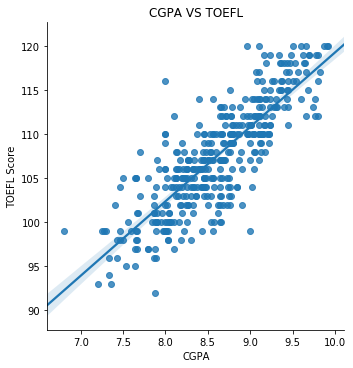

In [10]:
fig=sns.lmplot(x='CGPA',y='TOEFL Score',data=Reading)
plt.title("CGPA VS TOEFL")
plt.show()

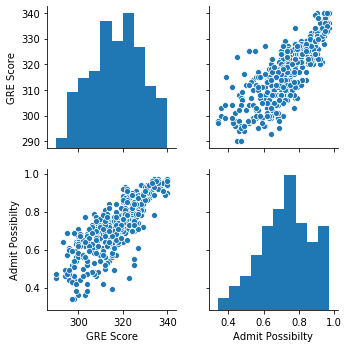

In [11]:
sns.pairplot(data=Reading,vars=["GRE Score","Admit Possibilty"])
plt.show()

We can see that the GRE SCORE is a deal breaker for getting an admit

# Predictions

# We are using a linear regression model. Why?

 # This is a supervised model data and also the independent variable X having the parameters GRE, TOEFL etc are in high relationship with the  dependent variable y being the chance of admit.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

Splitting the data as x and y where x contains the dependent varaiable data and y contains the independent variable data

In [13]:
x=Reading.drop('Admit Possibilty',axis='columns')
y=Reading['Admit Possibilty']
x_train,x_test,y_train,y_test=train_test_split(x, y)

Further Splitting the data as test and train where the train set contains the 80% of data and the test set contains 20% of the data where we can see that 300 out of 400 rows are taken

In [14]:
x_train.shape


(300, 7)

In [15]:
x_test.shape

(100, 7)

In [16]:
y_train.shape

(300,)

In [17]:
y_test.shape

(100,)

In [18]:
linear_regression = LinearRegression()
linear_regression = linear_regression.fit(x_train,y_train)

A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets

In [19]:
def get_cv_scores(linear_regression):
    scores = cross_val_score(linear_regression,
                             x_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

# get cross val scores
get_cv_scores(linear_regression)


CV Mean:  0.7757673309960802
STD:  0.07996332984599966




The CV score says that the model is neither an underfit nor an overfit. Any value between 0 and 1 is good.

The model is predicting on the test set

In [20]:
model = LinearRegression(normalize=True)
model.fit(x_test, y_test)
model.score(x_test, y_test)

0.8321927129676493

# Accuracy on the test set is 81.2%

## The model finally predicts the data based on user input

In [21]:
print('The chance of you getting an admit in the US is {}%'.format(round(model.predict([[305, 108, 4, 4.5, 4.5, 8.35, 0]])[0]*100, 1)))

The chance of you getting an admit in the US is 70.6%


### Serializing Model for building API uing joblib and doing same for model columns

In [26]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']

In [27]:
# Saving the data columns from training
model_columns = list(x.columns)
joblib.dump(model_columns, 'model_columns.pkl')
print("Models columns dumped!")

Models columns dumped!
